<h2> Family Income and Expenditure - FINALS
<h3> Dataset:  Family Income and Expenditure
<h4> Inclusive Years: 2024- 2025

    
<h5> Names:</h5>
<h5> Molina, Rogemson P.
<h5> Regala, Alley Kyle</h4>

<h3> Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

<h3> Importing DataFrame

In [ ]:
df = pd.read_csv('dataset\\Family Income and Expenditure.csv')

In [ ]:
df

<h3> Checking and filling up null values

In [ ]:
df.isnull().sum()

In [ ]:
df['Household Head Occupation'] = df['Household Head Occupation'].fillna("Unknown")
df['Household Head Class of Worker'] = df['Household Head Class of Worker'].fillna("Unknown")
df['Toilet Facilities'] = df['Toilet Facilities'].fillna("Unknown")
df['Age Group'] = df['Age Group'].fillna("Unspecified")

In [ ]:
df.isnull().sum()

<h3> Changing Data Types

In [7]:
category_cols = [
    'Region',
    'Main Source of Income',
    'Household Head Sex',
    'Household Head Marital Status',
    'Household Head Highest Grade Completed',
    'Household Head Job or Business Indicator',
    'Household Head Occupation',
    'Household Head Class of Worker',
    'Type of Household',
    'Type of Building/House',
    'Type of Roof',
    'Type of Walls',
    'Tenure Status',
    'Toilet Facilities',
    'Main Source of Water Supply',
]

df[category_cols] = df[category_cols].astype('category')

In [8]:
int32_cols = [
    'Agricultural Household indicator',
    'Bread and Cereals Expenditure',
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Total Fish and  marine products Expenditure',
    'Fruit Expenditure',
    'Vegetables Expenditure',
    'Restaurant and hotels Expenditure',
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Imputed House Rental Value',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses',
    'Total Income from Entrepreneurial Acitivites',
    'Household Head Age',
    'Total Number of Family members',
    'Members with age less than 5 year old',
    'Members with age 5 - 17 years old',
    'Total number of family members employed',
    'House Floor Area',
    'House Age',
    'Number of bedrooms',
    'Electricity',
    'Number of Television',
    'Number of CD/VCD/DVD',
    'Number of Component/Stereo set',
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Car, Jeep, Van',
    'Number of Landline/wireless telephones',
    'Number of Cellular phone',
    'Number of Personal Computer',
    'Number of Stove with Oven/Gas Range',
    'Number of Motorized Banca',
    'Number of Motorcycle/Tricycle'
]

df[int32_cols] = df[int32_cols].astype('int32')

In [16]:
df.dtypes

Total Household Income                              int64
Region                                           category
Total Food Expenditure                              int64
Main Source of Income                            category
Agricultural Household indicator                    int32
Bread and Cereals Expenditure                       int32
Total Rice Expenditure                              int32
Meat Expenditure                                    int32
Total Fish and  marine products Expenditure         int32
Fruit Expenditure                                   int32
Vegetables Expenditure                              int32
Restaurant and hotels Expenditure                   int32
Alcoholic Beverages Expenditure                     int32
Tobacco Expenditure                                 int32
Clothing, Footwear and Other Wear Expenditure       int32
Housing and water Expenditure                       int32
Imputed House Rental Value                          int32
Medical Care E

<h2> Average Total Income per Region

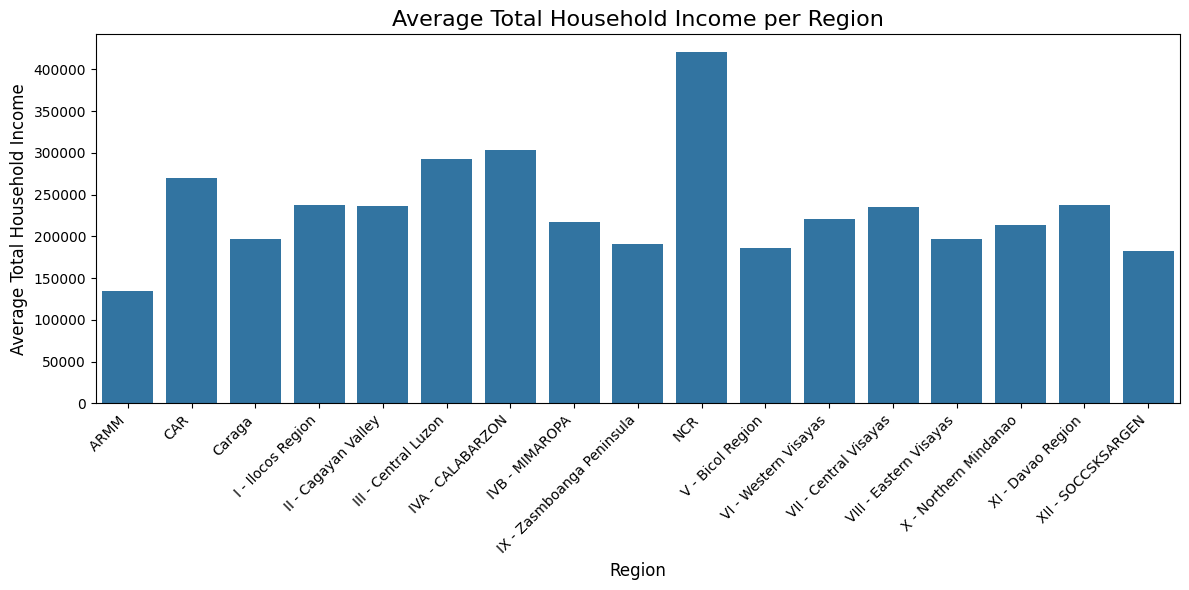

In [10]:
average_income_per_region = df.groupby('Region')['Total Household Income'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Household Income', data=average_income_per_region)
plt.title('Average Total Household Income per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Total Household Income', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h4> Philippine regional income data shows stark economic disparities, with NCR's income nearly 300% higher than ARMM's across all categories. Income sources vary by region, with wages typically representing 35-45% of earnings, while other income and entrepreneurial activities account for 30-35% and 25-35% respectively. A clear north-south economic gradient exists, as Luzon regions outperform Visayas by 20-30%, which in turn exceed Mindanao regions by 10-25%, reflecting differences in urbanization and industrial development throughout the country.

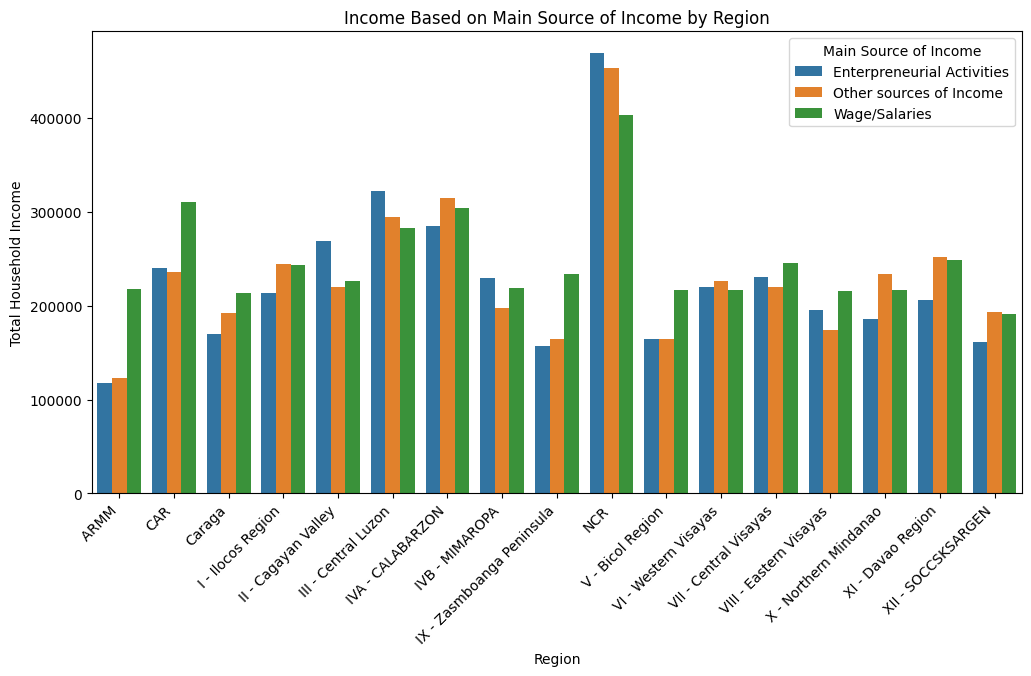

In [11]:
income_source = df.groupby(['Region', 'Main Source of Income'])['Total Household Income'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Household Income', hue='Main Source of Income', data=income_source)
plt.title('Income Based on Main Source of Income by Region')
plt.xticks(rotation=45, ha='right')
plt.show()

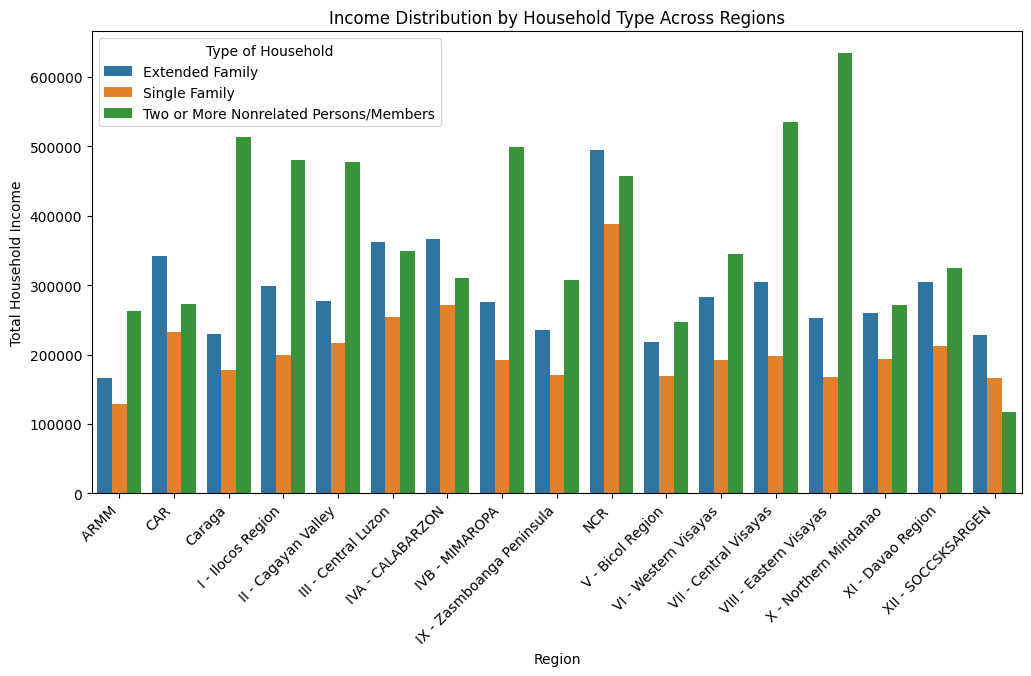

In [14]:
income_family_structure = df.groupby(['Region', 'Type of Household'])[['Total Household Income', 'Total Number of Family members']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Household Income', hue='Type of Household', data=income_family_structure)
plt.title('Income Distribution by Household Type Across Regions')
plt.xticks(rotation=45, ha='right')
plt.show()

        Household Head Highest Grade Completed  Total Household Income
0  Agriculture, Forestry, and Fishery Programs           558571.021739
1           Architecture and Building Programs           679430.636364
2                                Arts Programs           596816.869565
3                               Basic Programs           552240.181818
4         Business and Administration Programs           515785.748512


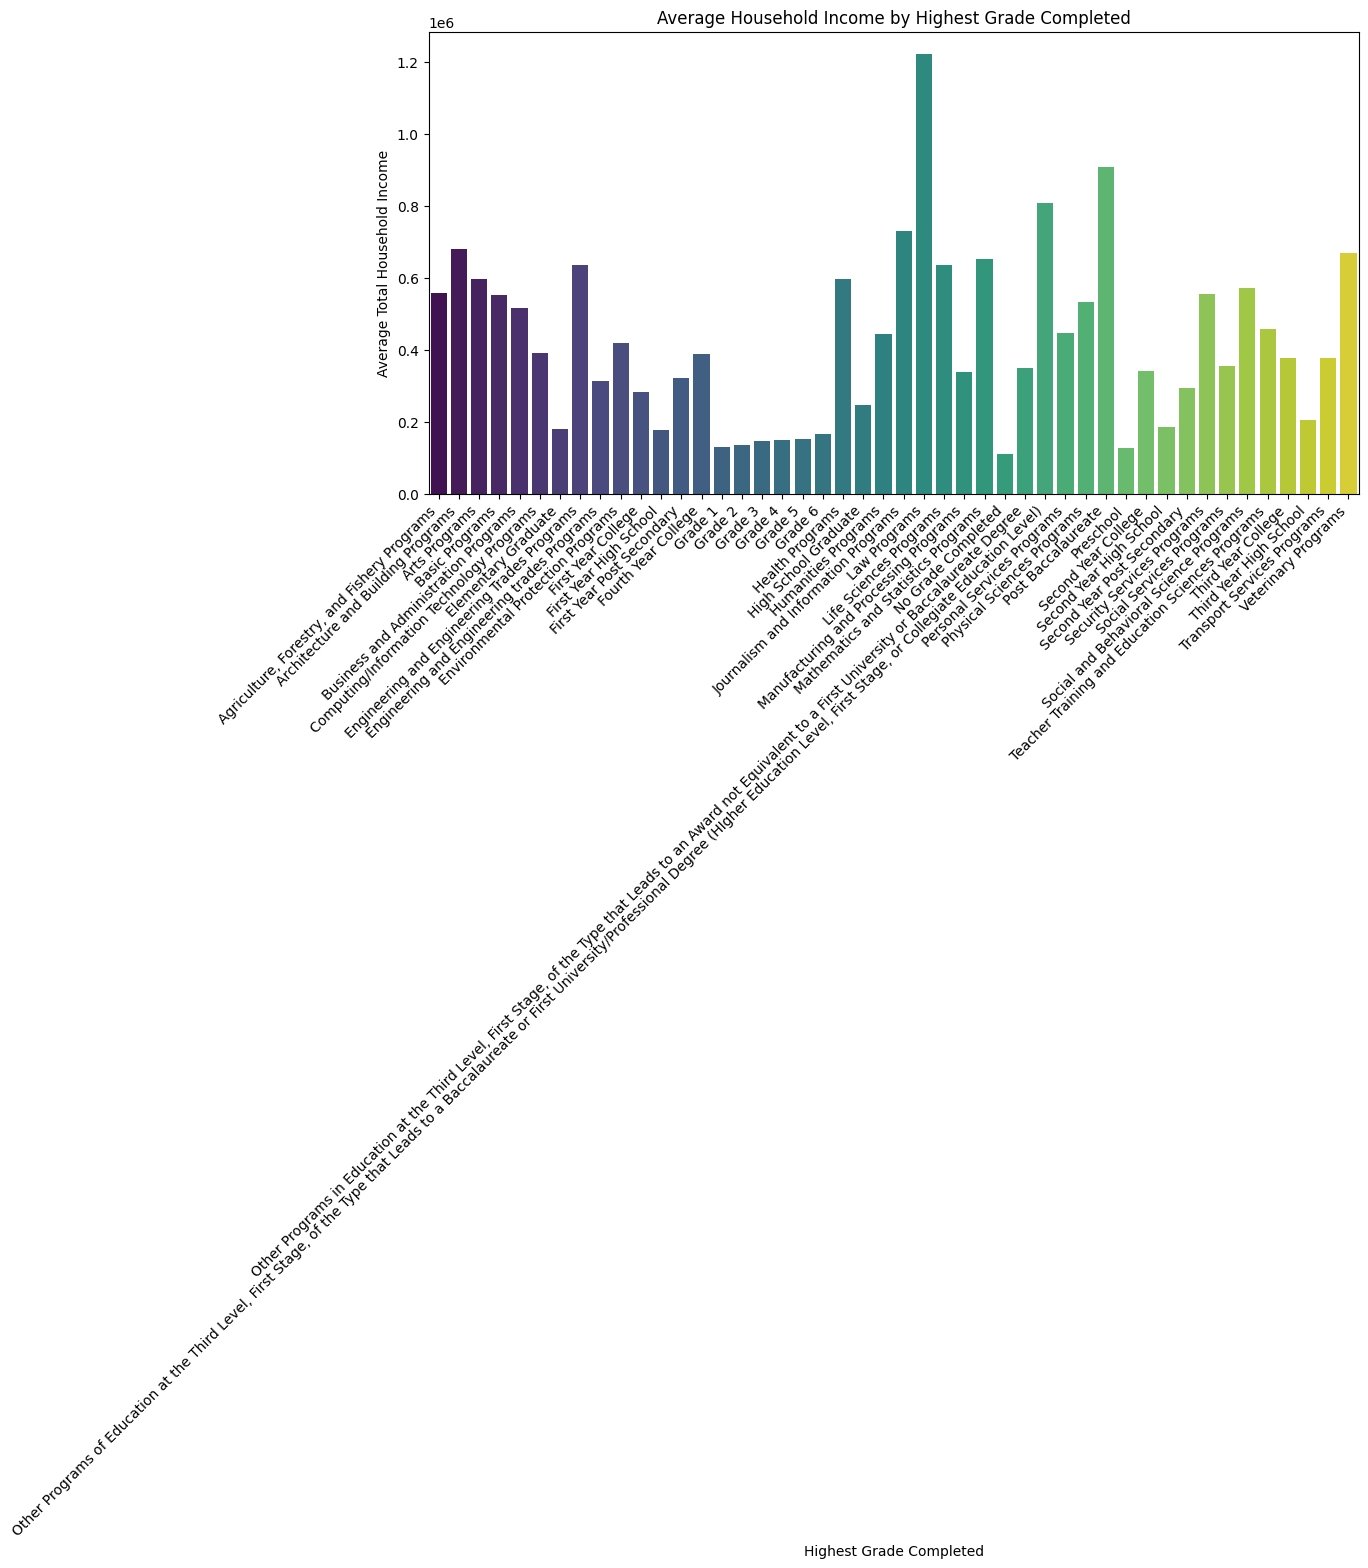

In [15]:
income_by_education = df.groupby('Household Head Highest Grade Completed')['Total Household Income'].mean().reset_index()
print(income_by_education.head())

plt.figure(figsize=(12, 6))
sns.barplot(data=income_by_education, x='Household Head Highest Grade Completed', y='Total Household Income', palette='viridis')
plt.title('Average Household Income by Highest Grade Completed')
plt.xlabel('Highest Grade Completed')
plt.ylabel('Average Total Household Income')
plt.xticks(rotation=45, ha='right')
plt.show()